dataset: https://www.kaggle.com/ashaheedq/video-games-sales-2019?select=vgsales-12-4-2019.csv

In [8]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from pprint import pprint

In [9]:
info_df = pd.read_csv('./resources/vgames_clean.csv')
info_df.drop_duplicates(subset ="game").reset_index().drop('index', axis=1)

,Unnamed: 0,game,Genre,ESRB_Rating,Platform,Publisher,Critic_Score,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,19,grand-theft-auto-v,Action,M,PS3,Rockstar Games,9.4,20.32,6.37,9.85,0.99,3.12,2013.0
1,30,grand-theft-auto-vice-city,Action,M,PS2,Rockstar Games,9.6,16.15,8.41,5.49,0.47,1.78,2002.0
2,40,call-of-duty-modern-warfare-3,Shooter,M,X360,Activision,8.7,14.82,9.07,4.29,0.13,1.33,2011.0
3,41,call-of-duty-black-ops,Shooter,M,X360,Activision,8.8,14.74,9.76,3.73,0.11,1.14,2010.0
4,45,red-dead-redemption-2,Action-Adventure,M,PS4,Rockstar Games,9.8,13.94,5.26,6.21,0.21,2.26,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,14601,disgaea-1-complete,Role-Playing,T,NS,NIS America,8.0,0.06,0.03,0.01,0.01,0.00,2018.0
1029,14972,virtua-striker-2002,Sports,E,GC,Sega,6.6,0.05,0.01,0.00,0.03,0.00,2002.0
1030,15289,grimgrimoire,Strategy,E10,PS2,NIS America,7.7,0.05,0.01,0.01,0.03,0.00,2007.0
1031,15834,metal-gear-solid-digital-graphic-novel,Misc,M,PSP,Konami,7.6,0.04,0.02,0.00,0.02,0.00,2006.0


In [22]:
info_df['Platform'].value_counts()

PS3     266
X360    265
PS2     117
PSP      99
DS       89
Wii      87
3DS      81
PS       78
PS4      57
NS       43
GC       29
WiiU     25
GBA      24
N64      14
XOne     11
XB        7
GBC       2
DC        2
GB        1
SAT       1
PSN       1
PSV       1
Name: Platform, dtype: int64

In [10]:
gamezzz = pd.read_csv('./resources/vgames_rec.csv').drop('Unnamed: 0', axis=1)
gamezzz.drop_duplicates(subset ="game").reset_index().drop('index', axis=1)

,game,Critic_Score,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Genre_Action,Genre_Action-Adventure,Genre_Adventure,Genre_Board Game,Genre_Fighting,Genre_MMO,Genre_Misc,Genre_Music,Genre_Party,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Sandbox,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,ESRB_Rating_E,ESRB_Rating_E10,ESRB_Rating_M,ESRB_Rating_T,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GBC,Platform_GC,Platform_N64,Platform_NS,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSN,Platform_PSP,Platform_PSV,Platform_SAT,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Publisher_2K Games,Publisher_2K Sports,Publisher_505 Games,Publisher_989 Studios,Publisher_AQ Interactive,Publisher_ASCII Entertainment,Publisher_Acclaim Entertainment,Publisher_Activision,Publisher_Agetec,Publisher_Aksys Games,Publisher_Arc System Works,Publisher_Atari,Publisher_Atlus,Publisher_Bandai,Publisher_Bandai Namco Entertainment,Publisher_Bandai Namco Games,Publisher_Bethesda Softworks,Publisher_Blizzard Entertainment,Publisher_CDV Software Entertainment,Publisher_Capcom,Publisher_City Interactive,Publisher_Codemasters,Publisher_D3 Publisher,Publisher_Deep Silver,Publisher_Disney Interactive Studios,Publisher_EA Sports,Publisher_Eidos Interactive,Publisher_Electronic Arts,Publisher_Enix,Publisher_GT Interactive,Publisher_Global Star Software,Publisher_Hello Games,Publisher_Hudson Soft,Publisher_Ignition Entertainment,Publisher_JoWood Productions,Publisher_KOEI,Publisher_Kalypso,Publisher_Koei Tecmo,Publisher_Konami,Publisher_Konami Digital Entertainment,Publisher_LucasArts,Publisher_Majesco,Publisher_Marvelous Interactive,Publisher_Maxis,Publisher_Microids,Publisher_Microsoft,Publisher_Microsoft Game Studios,Publisher_Microsoft Studios,Publisher_Midway Games,Publisher_Mojang,Publisher_NIS America,Publisher_Namco,Publisher_Namco Bandai,Publisher_Namco Bandai Games,Publisher_Natsume,Publisher_Nintendo,Publisher_Nippon Ichi Software,Publisher_Ocean,Publisher_RedOctane,Publisher_Rockstar Games,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Sony Computer Entertainment America,Publisher_Sony Interactive Entertainment,Publisher_Sony Online Entertainment,Publisher_SouthPeak Interactive,Publisher_Square,Publisher_Square EA,Publisher_Square Enix,Publisher_THQ,Publisher_Taito,Publisher_Take-Two Interactive,Publisher_Tecmo,Publisher_Tecmo Koei,Publisher_Touchstone,Publisher_Ubisoft,Publisher_Universal Interactive,Publisher_Valve,Publisher_Valve Corporation,Publisher_Warner Bros. Interactive,Publisher_Warner Bros. Interactive Entertainment,Publisher_Working Designs,Publisher_Xseed Games
0,grand-theft-auto-v,9.4,20.32,6.37,9.85,0.99,3.12,2013.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,grand-theft-auto-vice-city,9.6,16.15,8.41,5.49,0.47,1.78,2002.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,call-of-duty-modern-warfare-3,8.7,14.82,9.07,4.29,0.13,1.33,2011.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,call-of-duty-black-ops,8.8,14.74,9.76,3.73,0.11,1.14,2010.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,red-dead-rede

In [11]:
vgames=pd.read_csv('./resources/vgames_clean.csv').drop('Unnamed: 0', axis=1)
vgames.head()

,game,Genre,ESRB_Rating,Platform,Publisher,Critic_Score,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,grand-theft-auto-v,Action,M,PS3,Rockstar Games,9.4,20.32,6.37,9.85,0.99,3.12,2013.0
1,grand-theft-auto-v,Action,M,PS4,Rockstar Games,9.7,19.39,6.06,9.71,0.60,3.02,2014.0
2,grand-theft-auto-vice-city,Action,M,PS2,Rockstar Games,9.6,16.15,8.41,5.49,0.47,1.78,2002.0
3,call-of-duty-modern-warfare-3,Shooter,M,X360,Activision,8.7,14.82,9.07,4.29,0.13,1.33,2011.0
4,call-of-duty-black-ops,Shooter,M,X360,Activision,8.8,14.74,9.76,3.73,0.11,1.14,2010.0


In [12]:
games = vgames.game
vgames = vgames.drop('game', axis =1)
vgames = pd.get_dummies(vgames)
vgames

,Critic_Score,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Genre_Action,Genre_Action-Adventure,Genre_Adventure,Genre_Board Game,Genre_Fighting,Genre_MMO,Genre_Misc,Genre_Music,Genre_Party,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Sandbox,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,ESRB_Rating_E,ESRB_Rating_E10,ESRB_Rating_M,ESRB_Rating_T,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GBC,Platform_GC,Platform_N64,Platform_NS,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSN,Platform_PSP,Platform_PSV,Platform_SAT,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Publisher_2K Games,Publisher_2K Sports,Publisher_505 Games,Publisher_989 Studios,Publisher_AQ Interactive,Publisher_ASCII Entertainment,Publisher_Acclaim Entertainment,Publisher_Activision,Publisher_Agetec,Publisher_Aksys Games,Publisher_Arc System Works,Publisher_Atari,Publisher_Atlus,Publisher_Bandai,Publisher_Bandai Namco Entertainment,Publisher_Bandai Namco Games,Publisher_Bethesda Softworks,Publisher_Blizzard Entertainment,Publisher_CDV Software Entertainment,Publisher_Capcom,Publisher_City Interactive,Publisher_Codemasters,Publisher_D3 Publisher,Publisher_Deep Silver,Publisher_Disney Interactive Studios,Publisher_EA Sports,Publisher_Eidos Interactive,Publisher_Electronic Arts,Publisher_Enix,Publisher_GT Interactive,Publisher_Global Star Software,Publisher_Hello Games,Publisher_Hudson Soft,Publisher_Ignition Entertainment,Publisher_JoWood Productions,Publisher_KOEI,Publisher_Kalypso,Publisher_Koei Tecmo,Publisher_Konami,Publisher_Konami Digital Entertainment,Publisher_LucasArts,Publisher_Majesco,Publisher_Marvelous Interactive,Publisher_Maxis,Publisher_Microids,Publisher_Microsoft,Publisher_Microsoft Game Studios,Publisher_Microsoft Studios,Publisher_Midway Games,Publisher_Mojang,Publisher_NIS America,Publisher_Namco,Publisher_Namco Bandai,Publisher_Namco Bandai Games,Publisher_Natsume,Publisher_Nintendo,Publisher_Nippon Ichi Software,Publisher_Ocean,Publisher_RedOctane,Publisher_Rockstar Games,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Sony Computer Entertainment America,Publisher_Sony Interactive Entertainment,Publisher_Sony Online Entertainment,Publisher_SouthPeak Interactive,Publisher_Square,Publisher_Square EA,Publisher_Square Enix,Publisher_THQ,Publisher_Taito,Publisher_Take-Two Interactive,Publisher_Tecmo,Publisher_Tecmo Koei,Publisher_Touchstone,Publisher_Ubisoft,Publisher_Universal Interactive,Publisher_Valve,Publisher_Valve Corporation,Publisher_Warner Bros. Interactive,Publisher_Warner Bros. Interactive Entertainment,Publisher_Working Designs,Publisher_Xseed Games
0,9.4,20.32,6.37,9.85,0.99,3.12,2013.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9.7,19.39,6.06,9.71,0.60,3.02,2014.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9.6,16.15,8.41,5.49,0.47,1.78,2002.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8.7,14.82,9.07,4.29,0.13,1.33,2011.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8.8,14.74,9.76,3.73,0.11,1.14,2010.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [13]:
vgames['game'] = games

In [14]:
first_column = vgames.pop('game')

vgames.insert(0, 'game', first_column)

In [15]:
def get_recommended(df, game, n_neighbors=10):
    
    #add filters here 
    vgames.drop_duplicates(subset ="game").reset_index().drop('index', axis=1)

    
    df_sub = df.drop(["game"], axis=1)
    model_knn = NearestNeighbors(metric='jaccard', n_neighbors=n_neighbors)
    model_knn.fit(df_sub)
    
    game_row = df.loc[df["game"] == game].head(1)
    gr = df.loc[df["game"] == game].head(1) # for index value of game
    game_row = game_row.drop(["game"], axis=1)
    game_row = game_row.to_numpy()
    
    distances, indices = model_knn.kneighbors(game_row, n_neighbors = n_neighbors)
    gri = np.where(indices == gr.index)[1] # variable to hold game's index value in indices
    indices = indices[indices != gr.index] # drops input game if it is in indices array
    result = info_df.iloc[indices.flatten()]
    distances = np.delete(distances, gri) # drops input game from distances array
    result["Distance"] = distances
    
    # def statPredict(game):

    #     avgRating = 0
    #     avgGlobalSales = 0

    #     for index, row in result.iterrows():
    #         rl = len(result.index)
    #         avgRating = avgRating+row['Critic_Score']
    #         avgGlobalSales = avgGlobalSales+row['Global_Sales']

    #     avgRating = avgRating/rl
    #     avgRating = ("{:.1f}".format(avgRating))
    #     avgGlobalSales = avgGlobalSales/rl
    #     avgGlobalSales = ("{:.1f}".format(avgGlobalSales))

    #     actGlobalSales = gr['Global_Sales'].to_string(index=False)
    #     actRating = gr['Critic_Score'].to_string(index=False)

    #     print('prediction: ', avgRating, avgGlobalSales)
    #     print('actual: ', actRating, actGlobalSales)

    # statPredict(game)

    return result

In [21]:
recom_result = get_recommended(vgames, 'fifa-18')
recom_result
print(recom_result[['game','Distance','Critic_Score','ESRB_Rating','Platform']])

                                 game  Distance  Critic_Score ESRB_Rating  \
23                            fifa-16  0.000000           8.5           E   
44                            fifa-15  0.000000           8.1           E   
413  2010-fifa-world-cup-south-africa  0.166667           8.2           E   
114                    fifa-07-soccer  0.166667           8.4           E   
109                    fifa-soccer-12  0.166667           9.2           E   
399                       nba-live-07  0.166667           6.3           E   
112                   madden-nfl-2003  0.166667           9.4           E   
791                       nba-live-10  0.166667           7.9           E   
37                     fifa-soccer-12  0.166667           9.2           E   

    Platform  
23       PS4  
44       PS4  
413      PS3  
114      PS2  
109     X360  
399      PS2  
112      PS2  
791      PS3  
37       PS3  


C:\Users\Mastermind\anaconda3\envs\PyEnv\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
ipykernel_launcher:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


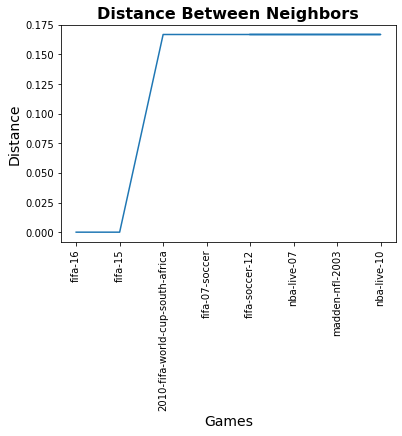

In [17]:
plt.plot(recom_result["game"], recom_result["Distance"])
plt.title("Distance Between Neighbors", fontsize=16, fontweight="bold")
plt.xlabel("Games", fontsize=14)
plt.xticks(rotation = 90)
plt.ylabel("Distance", fontsize=14)
plt.show()

In [18]:
def get_recommended_platform(df, platform, score=0, n_neighbors=10):
    
    #add filters here 
    vgames.drop_duplicates(subset ="game").reset_index().drop('index', axis=1)

    
    df_sub = df.drop(["game"], axis=1)
    model_knn = NearestNeighbors(metric='cosine', n_neighbors=n_neighbors)
    model_knn.fit(df_sub)
    
    game_row = df[(df[platform] == 1) & (df['Critic_Score'] >= score)].sample(1)
    game_row = game_row.drop(["game"], axis=1)
    game_row = game_row.to_numpy()
    
    distances, indices = model_knn.kneighbors(game_row, n_neighbors = n_neighbors)
    result = df.iloc[indices.flatten()]

    return result

In [19]:
results = get_recommended_platform(vgames, 'Platform_X360', 8)
results

,game,Critic_Score,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Genre_Action,Genre_Action-Adventure,Genre_Adventure,Genre_Board Game,Genre_Fighting,Genre_MMO,Genre_Misc,Genre_Music,Genre_Party,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Sandbox,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,ESRB_Rating_E,ESRB_Rating_E10,ESRB_Rating_M,ESRB_Rating_T,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GBC,Platform_GC,Platform_N64,Platform_NS,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSN,Platform_PSP,Platform_PSV,Platform_SAT,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Publisher_2K Games,Publisher_2K Sports,Publisher_505 Games,Publisher_989 Studios,Publisher_AQ Interactive,Publisher_ASCII Entertainment,Publisher_Acclaim Entertainment,Publisher_Activision,Publisher_Agetec,Publisher_Aksys Games,Publisher_Arc System Works,Publisher_Atari,Publisher_Atlus,Publisher_Bandai,Publisher_Bandai Namco Entertainment,Publisher_Bandai Namco Games,Publisher_Bethesda Softworks,Publisher_Blizzard Entertainment,Publisher_CDV Software Entertainment,Publisher_Capcom,Publisher_City Interactive,Publisher_Codemasters,Publisher_D3 Publisher,Publisher_Deep Silver,Publisher_Disney Interactive Studios,Publisher_EA Sports,Publisher_Eidos Interactive,Publisher_Electronic Arts,Publisher_Enix,Publisher_GT Interactive,Publisher_Global Star Software,Publisher_Hello Games,Publisher_Hudson Soft,Publisher_Ignition Entertainment,Publisher_JoWood Productions,Publisher_KOEI,Publisher_Kalypso,Publisher_Koei Tecmo,Publisher_Konami,Publisher_Konami Digital Entertainment,Publisher_LucasArts,Publisher_Majesco,Publisher_Marvelous Interactive,Publisher_Maxis,Publisher_Microids,Publisher_Microsoft,Publisher_Microsoft Game Studios,Publisher_Microsoft Studios,Publisher_Midway Games,Publisher_Mojang,Publisher_NIS America,Publisher_Namco,Publisher_Namco Bandai,Publisher_Namco Bandai Games,Publisher_Natsume,Publisher_Nintendo,Publisher_Nippon Ichi Software,Publisher_Ocean,Publisher_RedOctane,Publisher_Rockstar Games,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Sony Computer Entertainment America,Publisher_Sony Interactive Entertainment,Publisher_Sony Online Entertainment,Publisher_SouthPeak Interactive,Publisher_Square,Publisher_Square EA,Publisher_Square Enix,Publisher_THQ,Publisher_Taito,Publisher_Take-Two Interactive,Publisher_Tecmo,Publisher_Tecmo Koei,Publisher_Touchstone,Publisher_Ubisoft,Publisher_Universal Interactive,Publisher_Valve,Publisher_Valve Corporation,Publisher_Warner Bros. Interactive,Publisher_Warner Bros. Interactive Entertainment,Publisher_Working Designs,Publisher_Xseed Games
101,call-of-duty-advanced-warfare,9.1,4.34,2.81,1.13,0.00,0.41,2014.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
123,left-4-dead-2,9.0,3.97,2.67,0.88,0.05,0.38,2009.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
146,battlefield-4,8.7,3.54,2.16,1.05,0.02,0.32,2013.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
157,left-4-dead,8.7,3.52,2.66,0.49,0.05,0.31,2008.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
159,battlefield-bad-company-2,9.0,3.48,2